In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import detrend

In [2]:
# Ensure the project directory is set correctly
if not set(["notebooks", "scripts"]).issubset(os.listdir()):
    os.chdir(os.path.dirname(os.getcwd()))

In [3]:
# Define file paths
soft_skills_tfidf_by_years_filename = "reports/soft_skills_tfidf_by_years.csv"
top_bottom_soft_skills_by_year_filename = "reports/top_bottom_soft_skills_by_year.csv"

In [4]:
# Check if running in Google Colab
try:
    import google.colab

    IN_COLAB = True
except ImportError:
    IN_COLAB = False

In [5]:
# Mount Google Drive and adjust file paths if in Google Colab
if IN_COLAB:
    drive_mounted_path = "/content/drive"

    if not os.path.exists(drive_mounted_path):
        from google.colab import drive

        drive.mount(drive_mounted_path)

    project_dir = (
        "My Drive/School/UoGuelph/MSc/Research/soft_skills_job_desc/jfraeysd"
    )

    soft_skills_tfidf_by_years_filename = os.path.join(
        drive_mounted_path,
        project_dir,
        soft_skills_tfidf_by_years_filename,
    )
    top_bottom_soft_skills_by_year_filename = os.path.join(
        drive_mounted_path,
        project_dir,
        top_bottom_soft_skills_by_year_filename,
    )

In [6]:
# Read job description data
df_top_bottom_soft_skills_by_year = pd.read_csv(top_bottom_soft_skills_by_year_filename)
df_soft_skills_tfidf_by_years = pd.read_csv(soft_skills_tfidf_by_years_filename)

In [7]:
# Group soft skills TF-IDF data by year and skill
line_data = (
    df_soft_skills_tfidf_by_years.groupby(["year", "soft_skill"])["tf_idf_weight"]
    .mean()
    .reset_index()
)

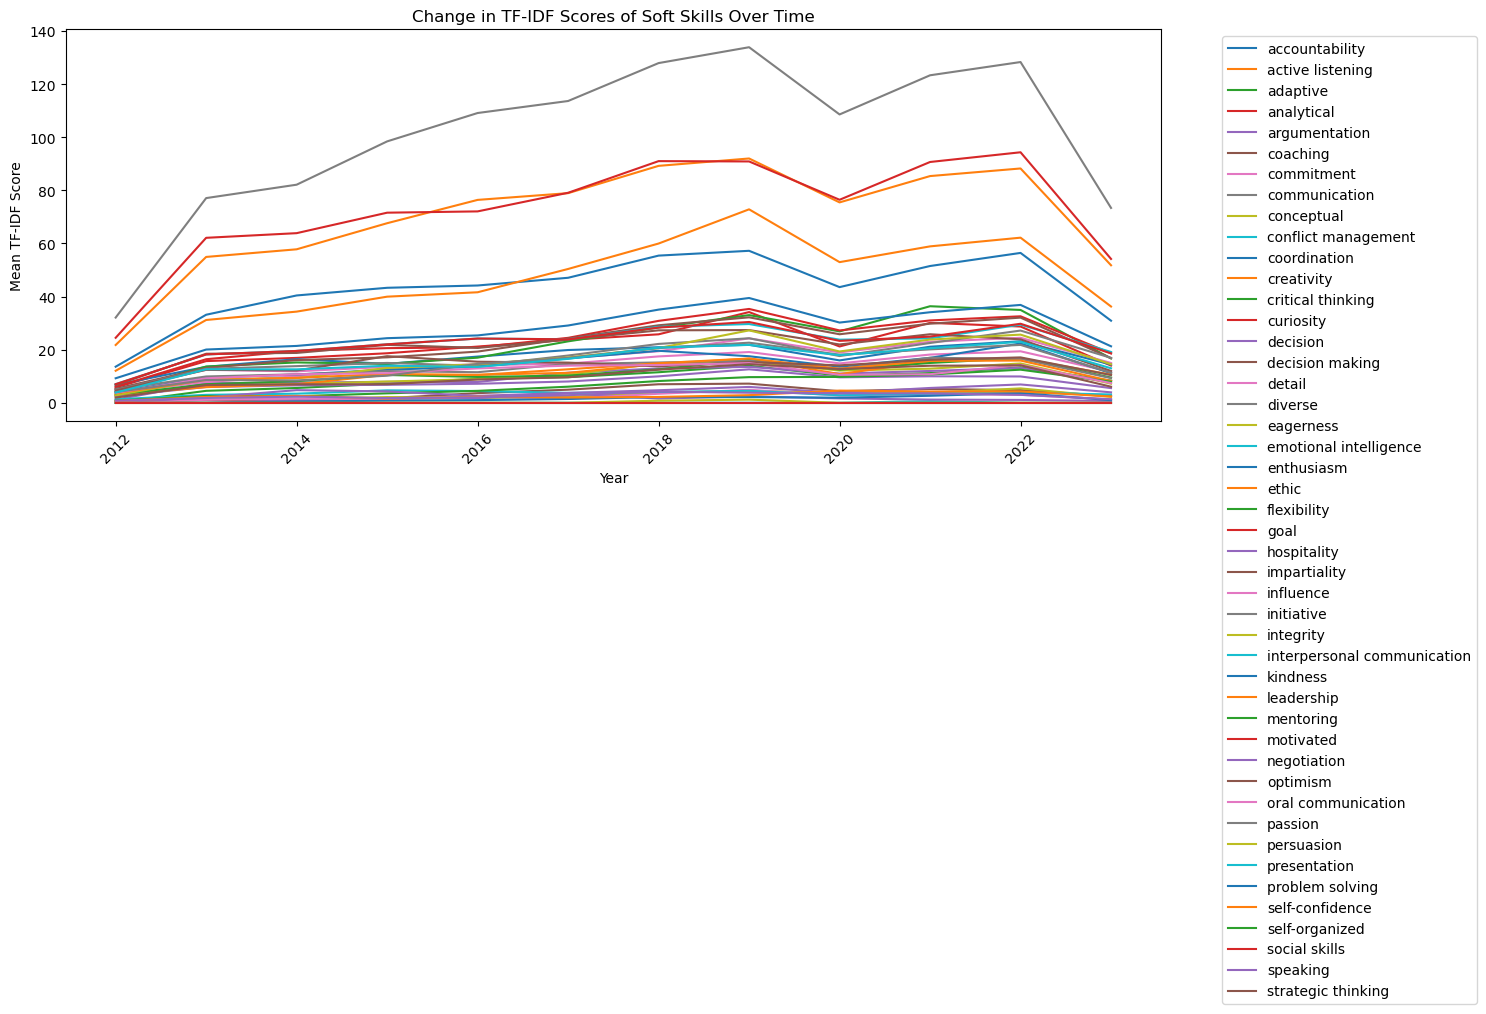

In [8]:
# Create the line graph for all soft skills TF-IDf
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=line_data, x="year", y="tf_idf_weight", hue="soft_skill", palette="tab10"
)
plt.title("Change in TF-IDF Scores of Soft Skills Over Time")
plt.xlabel("Year")
plt.ylabel("Mean TF-IDF Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("reports/figures/tf_idf_line_graph.png", bbox_inches="tight")
plt.show()

In [9]:
from IPython.display import display, HTML

csv_string = line_data.to_csv(index=False)
display(HTML('<pre>{}</pre>'.format(csv_string)))

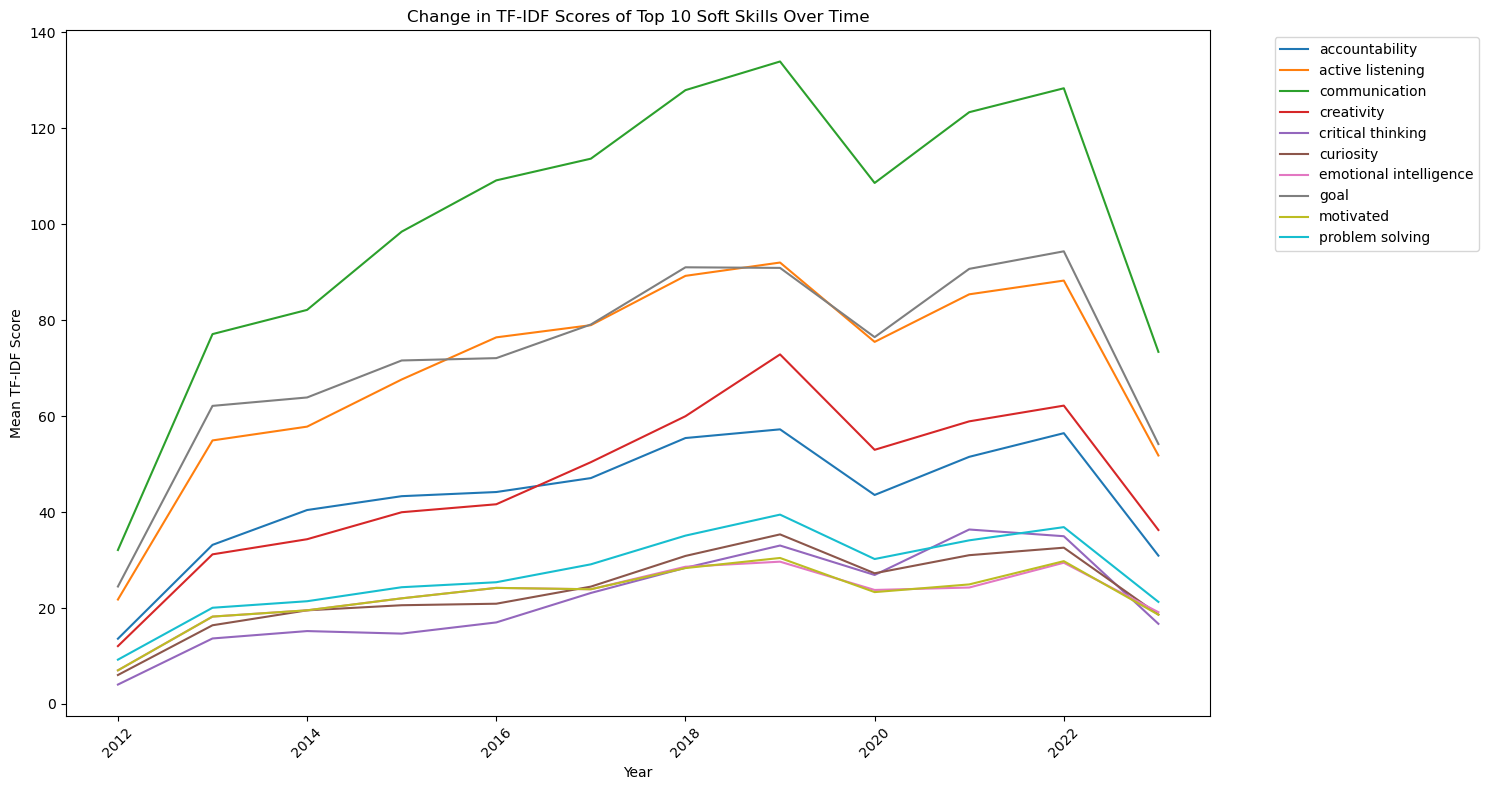

In [10]:
# Graphs of the top 10 soft skills tf-idf
# Sort the line_data dataframe to get the top 10 soft skills
top_10_skills = (
    line_data.groupby("soft_skill")["tf_idf_weight"].mean().nlargest(10).index
)

# Filter line_data to keep only the top 10 skills
line_data_top_10 = line_data[line_data["soft_skill"].isin(top_10_skills)]

# Create the line graph for the top 10 skills
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=line_data_top_10,
    x="year",
    y="tf_idf_weight",
    hue="soft_skill",
    palette="tab10",
)
plt.title("Change in TF-IDF Scores of Top 10 Soft Skills Over Time")
plt.xlabel("Year")
plt.ylabel("Mean TF-IDF Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("reports/figures/tf_idf_line_graph_top_10.png", bbox_inches="tight")
plt.show()

In [11]:
pd.set_option("display.max_rows", None)
line_data_top_10

,year,soft_skill,tf_idf_weight
0,2012,accountability,13.595847
1,2012,active listening,21.767397
7,2012,communication,32.089391
11,2012,creativity,12.058439
12,2012,critical thinking,4.040892
13,2012,curiosity,6.031779
19,2012,emotional intelligence,7.006823
23,2012,goal,24.480649
33,2012,motivated,7.006823
40,2012,problem solving,9.230925


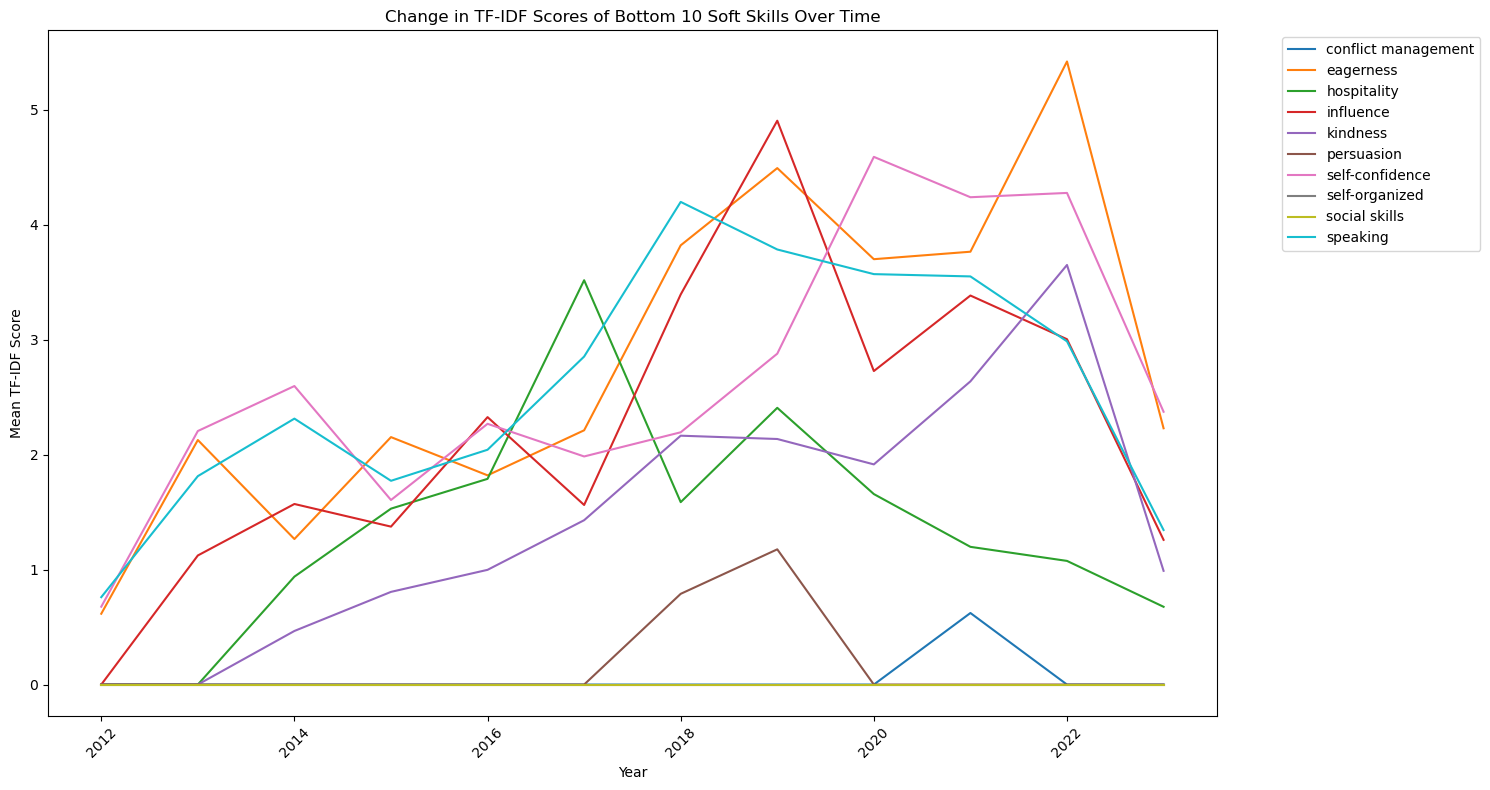

In [12]:
# Graphs of the bottom 10 soft skills
# Sort the line_data dataframe to get the bottom 10 soft skills
bottom_10_skills = (
    line_data.groupby("soft_skill")["tf_idf_weight"].mean().nsmallest(10).index
)

# Filter line_data to keep only the bottom 10 skills
line_data_bottom_10 = line_data[line_data["soft_skill"].isin(bottom_10_skills)]

# Create the line graph for the bottom 10 skills
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=line_data_bottom_10,
    x="year",
    y="tf_idf_weight",
    hue="soft_skill",
    palette="tab10",
)
plt.title("Change in TF-IDF Scores of Bottom 10 Soft Skills Over Time")
plt.xlabel("Year")
plt.ylabel("Mean TF-IDF Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("reports/figures/tf_idf_line_graph_bottom_10.png", bbox_inches="tight")
plt.show()

In [13]:
display(line_data_bottom_10)

,year,soft_skill,tf_idf_weight
9,2012,conflict management,0.000000
18,2012,eagerness,0.616029
24,2012,hospitality,0.000000
26,2012,influence,0.000000
30,2012,kindness,0.000000
38,2012,persuasion,0.000000
41,2012,self-confidence,0.677190
42,2012,self-organized,0.000000
43,2012,social skills,0.000000
44,2012,speaking,0.760070


In [14]:
df_top_bottom_soft_skills_by_year.head(10)

,Unnamed: 0,year,soft_skill,tf_idf_weight,rank,rank_type
0,0,2012,communication,32.089391,1,top
1,1,2012,goal,24.480649,2,top
2,2,2012,active listening,21.767397,3,top
3,3,2012,accountability,13.595847,4,top
4,4,2012,creativity,12.058439,5,top
5,5,2012,problem solving,9.230925,6,top
6,6,2012,emotional intelligence,7.006823,7,top
7,7,2012,motivated,7.006823,8,top
8,8,2012,coordination,6.750346,9,top
9,9,2012,impartiality,6.632302,10,top


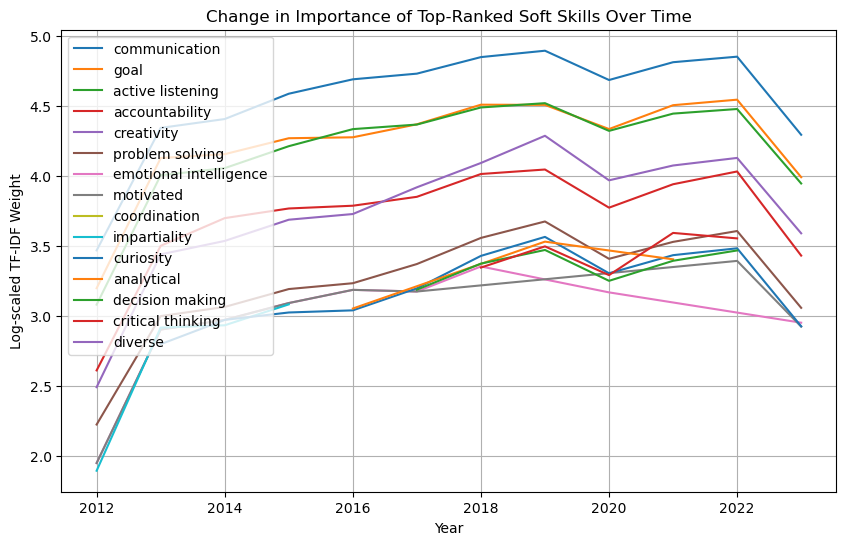

In [15]:
# Graph soft log changes for the top 10 soft skills
# Define the rank_type and threshold for the top skills
rank_type = "top"

# Create a filtered copy of the data based on the rank and rank_type
filtered_df = df_top_bottom_soft_skills_by_year[
    df_top_bottom_soft_skills_by_year["rank_type"] == rank_type
].copy()

# Calculate the log-scaled TF-IDF scores
filtered_df["log_tfidf_weight"] = filtered_df["tf_idf_weight"].apply(
    lambda x: np.log(x)
)

# Create the line graph for the top-ranked soft skills
plt.figure(figsize=(10, 6))

# Iterate through unique soft skills
for skill in filtered_df["soft_skill"].unique():
    skill_df = filtered_df[filtered_df["soft_skill"] == skill]
    plt.plot(skill_df["year"], skill_df["log_tfidf_weight"], label=skill)

# Customize the graph
plt.xlabel("Year")
plt.ylabel("Log-scaled TF-IDF Weight")
plt.title("Change in Importance of Top-Ranked Soft Skills Over Time")
plt.legend()

# Save the graph to a file (e.g., as a PNG image)
plt.savefig("reports/figures/tf_idf_log_change_top_10.png", bbox_inches="tight")

# Display the graph (optional)
plt.grid(True)
plt.show()

In [16]:
# Calculate logarithmic changes in TF-IDF weights over the years
# for each keyword
df_pivot = df_soft_skills_tfidf_by_years.pivot_table(
    index="soft_skill", columns="year", values="tf_idf_weight", fill_value=0,
)
log_changes = np.log1p(df_pivot)
log_changes.to_csv("reports/log_changes.csv")


# Calculate the total log change for each keyword
log_changes["Total Log Change"] = log_changes.sum(axis=1)

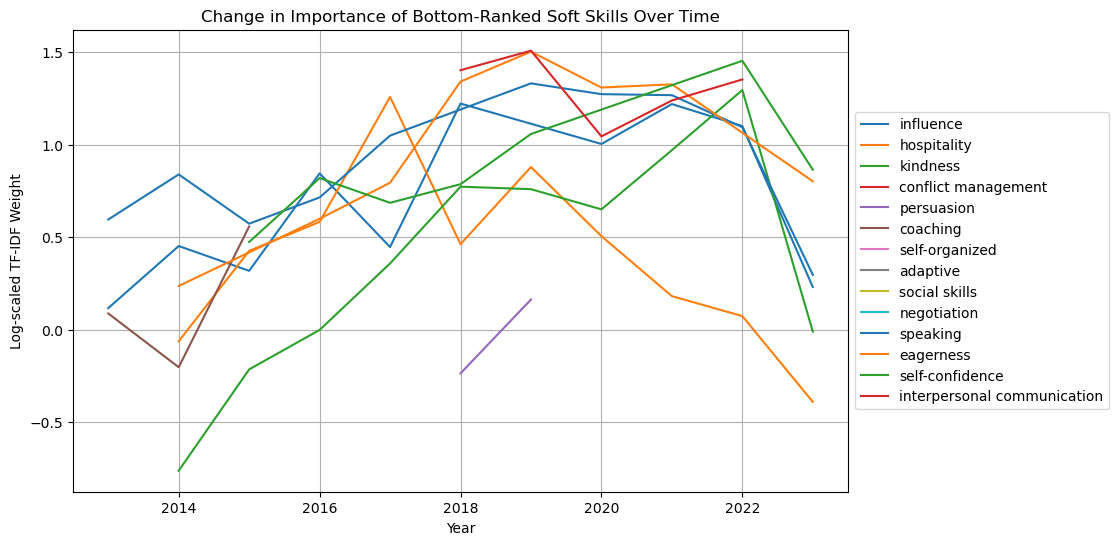

In [17]:
# Graphs for the bottom 10 soft skills tf-idf
# Define the rank_type and threshold for the top skills
rank_type = "bottom"

# Create a filtered copy of the data based on the rank and rank_type
filtered_df = df_top_bottom_soft_skills_by_year[
    df_top_bottom_soft_skills_by_year["rank_type"] == rank_type
].copy()

# Calculate the log-scaled TF-IDF scores
filtered_df["log_tfidf_weight"] = filtered_df["tf_idf_weight"].apply(
    lambda x: np.log(x)
)

# Create the line graph for the top-ranked soft skills
plt.figure(figsize=(10, 6))

# Iterate through unique soft skills
for skill in filtered_df["soft_skill"].unique():
    skill_df = filtered_df[filtered_df["soft_skill"] == skill]
    plt.plot(skill_df["year"], skill_df["log_tfidf_weight"], label=skill)

# Customize the graph
plt.xlabel("Year")
plt.ylabel("Log-scaled TF-IDF Weight")
plt.title("Change in Importance of Bottom-Ranked Soft Skills Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save the graph to a file (e.g., as a PNG image)
plt.savefig("reports/figures/tf_idf_log_change_bottom_10.png",
            bbox_inches="tight",
            )

# Display the graph (optional)
plt.grid(True)
plt.show()

In [18]:
filtered_df[["year", "soft_skill", "log_tfidf_weight"]]

,year,soft_skill,log_tfidf_weight
10,2012,influence,-inf
11,2012,hospitality,-inf
12,2012,kindness,-inf
13,2012,conflict management,-inf
14,2012,persuasion,-inf
15,2012,coaching,-inf
16,2012,self-organized,-inf
17,2012,adaptive,-inf
18,2012,social skills,-inf
19,2012,negotiation,-inf


In [19]:
df_pivot = df_soft_skills_tfidf_by_years.pivot_table(
    index="soft_skill", columns="year", values="tf_idf_weight", fill_value=0,
)

In [20]:
# Calculate logarithmic changes in TF-IDF weights over the years
# for each keyword
log_changes = np.log1p(df_pivot)
log_changes.to_csv("reports/log_changes.csv")


# Calculate the total log change for each keyword
log_changes["Total Log Change"] = log_changes.sum(axis=1)
log_changes

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Log Change
soft_skill,,,,,,,,,,,,,
accountability,2.680737,3.531079,3.723852,3.791230,3.810578,3.872916,4.033034,4.064587,3.796923,3.961065,4.050826,3.463097,44.779923
active listening,3.125330,4.024130,4.074269,4.228816,4.349207,4.381481,4.502449,4.532732,4.336938,4.458857,4.491464,3.966371,50.472042
adaptive,0.000000,1.705147,1.882802,2.105057,2.308812,2.364262,2.525735,2.704097,2.419190,2.499913,2.665097,2.234509,25.414619
analytical,1.909755,2.815346,2.885413,2.978150,3.098693,3.206238,3.287983,3.560030,3.100494,3.437212,3.391906,2.708568,36.379787
argumentation,0.781618,2.121720,2.152878,2.186918,2.178911,2.510946,2.633638,2.675336,2.484944,2.563807,2.647432,2.211564,27.149712
coaching,0.000000,0.737492,0.596414,1.010021,1.531806,1.780445,2.076212,2.105443,1.677939,1.821495,1.752970,1.257351,16.347589
commitment,1.822832,2.595986,2.552599,2.675537,2.740017,2.881011,3.016188,3.229189,2.995090,3.176608,3.238232,2.771743,33.695033
communication,3.499213,4.357934,4.420549,4.599670,4.701759,4.742001,4.859405,4.904690,4.696852,4.823114,4.862447,4.309366,54.777000
conceptual,1.226238,2.019437,2.089283,2.198652,2.291446,2.446731,2.765251,2.805902,2.575399,2.628197,2.760157,2.102792,27.909484


In [21]:
# Create a new DataFrame to store rankings
rankings_df = pd.DataFrame(index=log_changes.index)

# Iterate over each year
for year in log_changes.columns:
    # Rank the soft skills based on TF-IDF weight for the current year
    rankings_df[f"{year}_Rank"] = log_changes[year].rank(ascending=False)

# Display the rankings DataFrame
print(rankings_df)

                             2012_Rank  2013_Rank  2014_Rank  2015_Rank  \
soft_skill                                                                
accountability                     4.0        4.0        4.0        4.0   
active listening                   3.0        3.0        3.0        3.0   
adaptive                          41.5       32.0       32.0       30.0   
analytical                        12.0       11.0       11.0       11.0   
argumentation                     32.0       26.0       27.0       29.0   
coaching                          41.5       40.0       41.0       38.0   
commitment                        14.0       18.0       18.0       18.0   
communication                      1.0        1.0        1.0        1.0   
conceptual                        29.0       29.0       28.0       28.0   
conflict management               41.5       43.5       44.5       44.5   
coordination                       9.0       13.0       12.0       16.0   
creativity               

In [22]:
# Assuming 'rankings_df' is the DataFrame containing rankings for each soft skill
# Replace 'rankings_df' with your actual DataFrame name

# List of years for which to calculate rank changes
years_list = ["2012", "2017", "2022"]

# Calculate the rank changes for each consecutive pair of years
rank_changes = {}
for i in range(len(years_list) - 1):
    start_year = years_list[i]
    end_year = years_list[i + 1]
    
    # Calculate the change in rank for each soft skill between start_year and end_year
    rank_changes[start_year + "_" + end_year] = (
        rankings_df[end_year + "_Rank"] - rankings_df[start_year + "_Rank"]
    ).sort_values(ascending=False)

# Display the results
for year_pair, rank_change in rank_changes.items():
    print(
        f"Soft Skill with the Most Positive Change from {year_pair.split('_')[0]} "
        f"to {year_pair.split('_')[1]}: "
    )
    print(rank_change.head(10).to_string(header=False))
    print(
        f"Soft Skill with the Most Negative Change from {year_pair.split('_')[0]} "
        f"to {year_pair.split('_')[1]}: "
    )
    print(rank_change.tail(10).to_string(header=False))

Soft Skill with the Most Positive Change from 2012 to 2017: 
initiative                     8.0
coordination                   5.0
interpersonal communication    5.0
self-confidence                5.0
optimism                       4.0
decision                       4.0
flexibility                    4.0
commitment                     4.0
speaking                       4.0
persuasion                     3.0
Soft Skill with the Most Negative Change from 2012 to 2017: 
passion              -2.0
curiosity            -4.0
hospitality          -4.5
critical thinking    -5.0
decision making      -5.0
argumentation        -6.0
negotiation          -6.5
coaching             -7.5
integrity           -11.0
adaptive            -11.5
Soft Skill with the Most Positive Change from 2017 to 2022: 
hospitality                    5.0
argumentation                  5.0
impartiality                   5.0
oral communication             4.0
speaking                       3.0
passion                        3

In [23]:
# Sort the keywords by the total log change in descending order
sorted_keywords = log_changes.sort_values(
                    by="Total Log Change",
                    ascending=False,
                )

In [24]:
# Display the top keywords with the greatest log changes
top_changed_keywords = sorted_keywords.head(10)

print(top_changed_keywords[["Total Log Change"]])

year                    Total Log Change
soft_skill                              
communication                  54.777000
goal                           50.994705
active listening               50.472042
creativity                     45.268835
accountability                 44.779923
problem solving                39.413913
curiosity                      37.575455
motivated                      37.309101
emotional intelligence         37.302464
decision making                36.458303


In [25]:
# Display the keywords with the least log changes
least_changed_keywords = sorted_keywords.tail(
    10
)  # You can change the number of keywords to display

print(least_changed_keywords[["Total Log Change"]])

year                 Total Log Change
soft_skill                           
eagerness                   15.204746
self-confidence             14.968208
speaking                    14.760031
influence                   12.953891
kindness                     9.433285
hospitality                  9.310669
persuasion                   1.359211
conflict management          0.483880
self-organized               0.000000
social skills                0.000000


In [26]:
top_changed_keywords['Total Log Change'].index

Index(['communication', 'goal', 'active listening', 'creativity',
       'accountability', 'problem solving', 'curiosity', 'motivated',
       'emotional intelligence', 'decision making'],
      dtype='object', name='soft_skill')

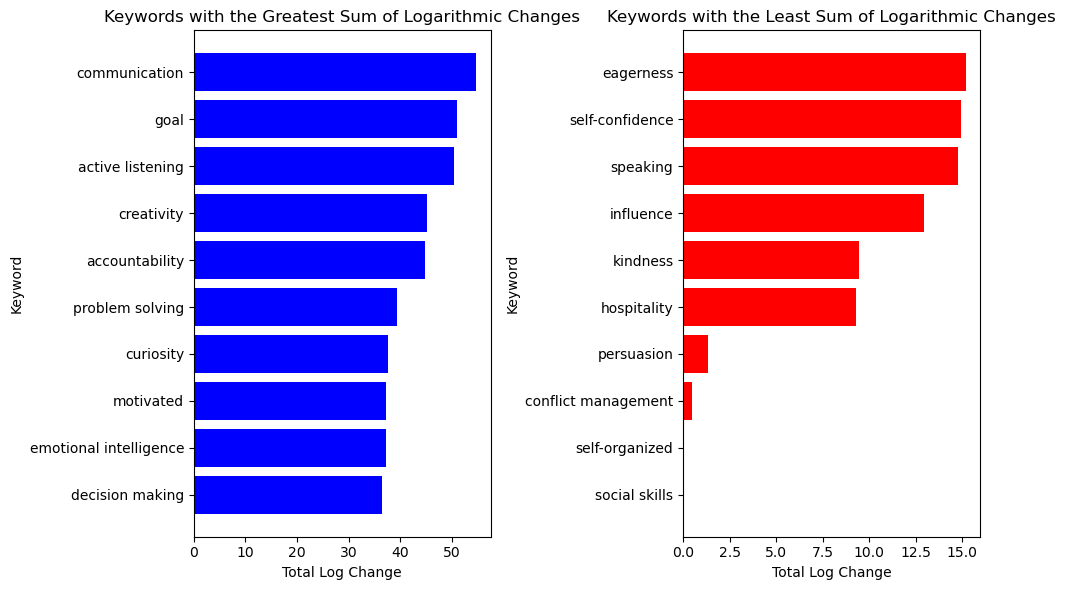

In [27]:
reversed_top_changed_keywords = top_changed_keywords.iloc[::-1]
reversed_least_changed_keywords = least_changed_keywords.iloc[::-1]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Bar chart for the top keywords
ax1.barh(reversed_top_changed_keywords.index,
         reversed_top_changed_keywords['Total Log Change'],
         color="blue",
         )
ax1.set_title("Keywords with the Greatest Sum of Logarithmic Changes")
ax1.set_xlabel("Total Log Change")
ax1.set_ylabel("Keyword")

# Bar chart for the bottom keywords
ax2.barh(reversed_least_changed_keywords.index,
         reversed_least_changed_keywords['Total Log Change'],
         color="red",
         )
ax2.set_title("Keywords with the Least Sum of Logarithmic Changes")
ax2.set_xlabel("Total Log Change")
ax2.set_ylabel("Keyword")

plt.tight_layout()

# Save the graph as a PNG image
plt.savefig("reports/figures/top_least_log_changes.png", bbox_inches="tight")
plt.show()

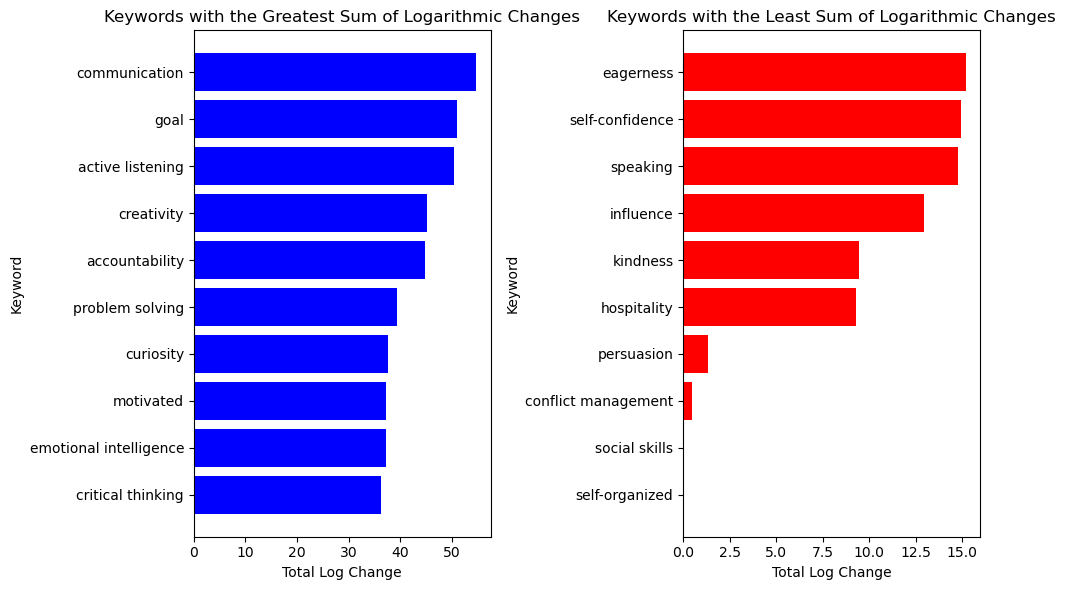

In [28]:
# Create a bar chart to show the keywords with the greatest and least changes
top_log_changes = log_changes.loc[log_changes.index.isin(
    line_data_top_10['soft_skill'])
].sort_values(by='Total Log Change')

bottom_log_changes = log_changes.loc[log_changes.index.isin(
    line_data_bottom_10['soft_skill'])
].sort_values(by='Total Log Change')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Bar chart for the top keywords
ax1.barh(top_log_changes.index, top_log_changes["Total Log Change"], color="blue")
ax1.set_title("Keywords with the Greatest Sum of Logarithmic Changes")
ax1.set_xlabel("Total Log Change")
ax1.set_ylabel("Keyword")

# Bar chart for the bottom keywords
ax2.barh(bottom_log_changes.index, bottom_log_changes["Total Log Change"], color="red")
ax2.set_title("Keywords with the Least Sum of Logarithmic Changes")
ax2.set_xlabel("Total Log Change")
ax2.set_ylabel("Keyword")

plt.tight_layout()

# Save the graph as a PNG image
plt.savefig("reports/figures/tfidf_changes_top_bottom_10_skills.png", bbox_inches="tight")
plt.show()

In [29]:
# Detrend each row in the DataFrame, excluding the "Total Log Change" column
log_changes_detrended = log_changes.drop(columns=["Total Log Change"]).apply(
    lambda row: pd.Series(detrend(row.dropna()), index=row.dropna().index),
    axis=1
)

# Add the "Total Log Change" column back to the detrended DataFrame
log_changes_detrended["Total Log Change"] = log_changes["Total Log Change"]

# Display the DataFrame with the detrended values
log_changes_detrended.head()

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Log Change
soft_skill,,,,,,,,,,,,,
accountability,-0.745254,0.049511,0.186709,0.198510,0.162282,0.169043,0.273586,0.249563,-0.073678,0.034888,0.069073,-0.574233,44.779923
active listening,-0.746794,0.091300,0.080734,0.174576,0.234262,0.205830,0.266093,0.235670,-0.020829,0.040385,0.012286,-0.573512,50.472042
adaptive,-1.339867,0.223822,0.260019,0.340817,0.403113,0.317106,0.337121,0.374025,-0.052339,-0.113074,-0.089348,-0.661394,25.414619
analytical,-0.738893,0.097061,0.097492,0.120592,0.171499,0.209407,0.221516,0.423927,-0.105247,0.161835,0.046892,-0.706082,36.379787
argumentation,-0.972408,0.275249,0.213961,0.155556,0.055104,0.294693,0.324939,0.274192,-0.008646,-0.022228,-0.031049,-0.559362,27.149712


In [30]:
# Calculate the absolute sum of changes for each skill
absolute_log_changes_no_trend = log_changes_detrended.abs().sum(axis=1)

In [31]:
# Get the top 10 skills with the greatest absolute total log changes (with trends removed)
filtered_df_no_trend = log_changes_detrended.nlargest(10, "Total Log Change")

# Display the filtered DataFrame
filtered_df_no_trend

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Log Change
soft_skill,,,,,,,,,,,,,
communication,-0.729338,0.068256,0.069744,0.187738,0.228700,0.207814,0.264092,0.248250,-0.020716,0.044419,0.022624,-0.591583,54.777000
goal,-0.708163,0.144005,0.116202,0.173340,0.124835,0.161273,0.244849,0.188345,-0.037723,0.075772,0.059725,-0.542459,50.994705
active listening,-0.746794,0.091300,0.080734,0.174576,0.234262,0.205830,0.266093,0.235670,-0.020829,0.040385,0.012286,-0.573512,50.472042
creativity,-0.731835,0.084555,0.092381,0.154486,0.108523,0.210066,0.295328,0.401306,0.001983,0.020609,-0.011766,-0.625635,45.268835
accountability,-0.745254,0.049511,0.186709,0.198510,0.162282,0.169043,0.273586,0.249563,-0.073678,0.034888,0.069073,-0.574233,44.779923
problem solving,-0.584284,0.069165,0.063630,0.117967,0.090011,0.154301,0.267411,0.313747,-0.014105,0.035384,0.042685,-0.555912,39.413913
curiosity,-0.730527,0.093744,0.176500,0.145074,0.077742,0.146711,0.288917,0.338938,0.004687,0.048207,0.013988,-0.603982,37.575455
motivated,-0.705302,0.111038,0.118069,0.174148,0.205690,0.135598,0.239915,0.250475,-0.065112,-0.060022,0.052643,-0.457137,37.309101
emotional intelligence,-0.703864,0.112315,0.119185,0.175103,0.206484,0.136231,0.249724,0.225859,-0.046684,-0.085336,0.041749,-0.430768,37.302464


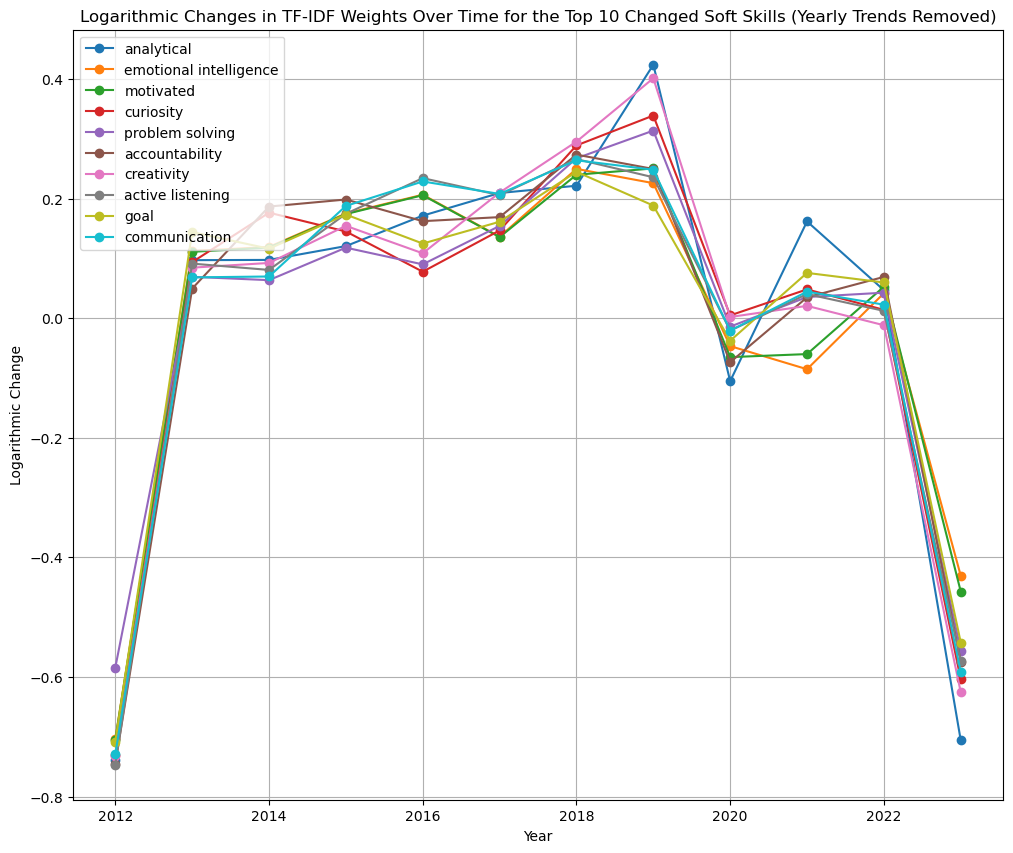

In [32]:
# Find the indices of the top 10 skills with the most change
top_10_changed_indices = np.argsort(absolute_log_changes_no_trend)[-10:]

# Get the corresponding skills for the top 10 changed skills
top_10_changed_skills = log_changes_detrended.index[top_10_changed_indices]

# Create a line chart to show the log changes for the top 10 changed skills
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

for skill in top_10_changed_skills:
    # Select columns for plotting (excluding the last column)
    columns_to_plot = log_changes_detrended.columns[:-1]
    plt.plot(
        columns_to_plot,
        log_changes_detrended.loc[skill, columns_to_plot],
        marker="o",
        label=skill,
    )

plt.title(
    "Logarithmic Changes in TF-IDF Weights Over Time for the Top 10 Changed Soft Skills (Yearly Trends Removed)"
)
plt.xlabel("Year")
plt.ylabel("Logarithmic Change")
plt.legend(loc="upper left")  # Adjust legend placement as needed
plt.grid(True)

# Save the chart to a file (e.g., as a PNG image)
plt.savefig("reports/figures/top10_changed_log_changes_no_trend.png", bbox_inches="tight")

# Display the chart (optional)
plt.show()

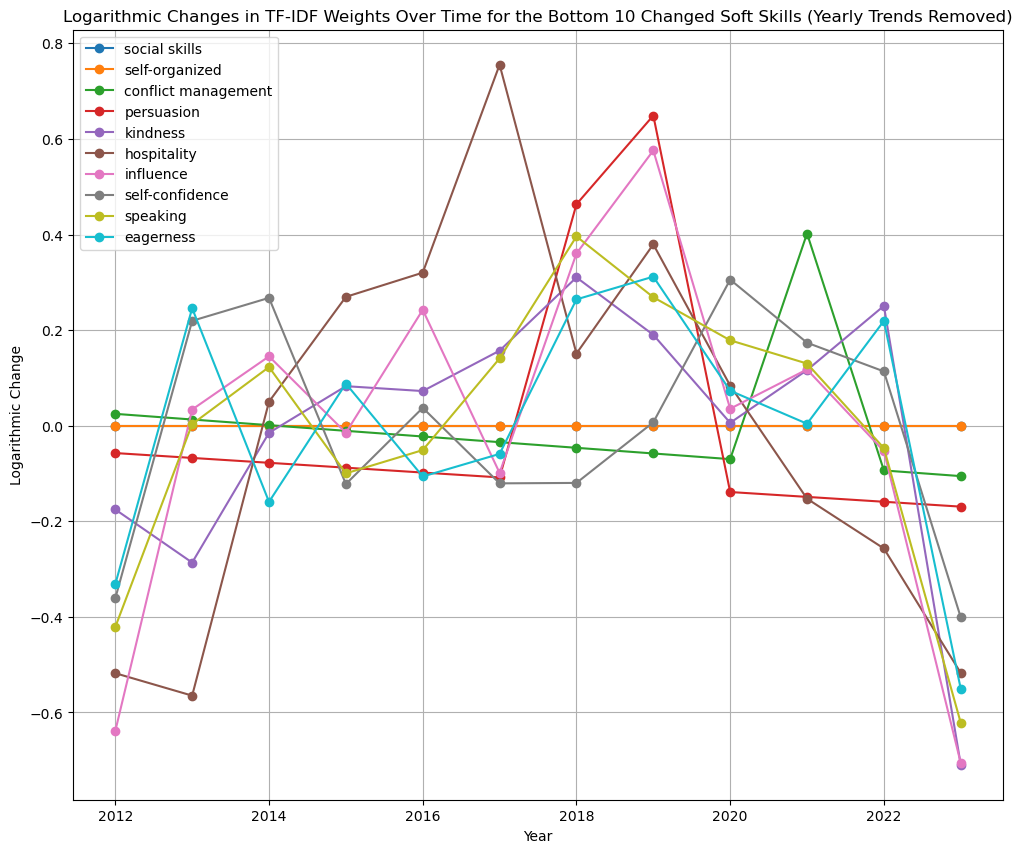

In [33]:
# Find the indices of the bottom 10 skills with the least change
bottom_10_changed_indices = np.argsort(absolute_log_changes_no_trend)[:10]

# Get the corresponding skills for the bottom 10 changed skills
bottom_10_changed_skills = log_changes_detrended.index[bottom_10_changed_indices]

# Create a line chart to show the log changes for the bottom 10 changed skills
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

for skill in bottom_10_changed_skills:
    # Select columns for plotting (excluding the last column)
    columns_to_plot = log_changes_detrended.columns[:-1]
    plt.plot(
        columns_to_plot,
        log_changes_detrended.loc[skill, columns_to_plot],
        marker="o",
        label=skill,
    )

plt.title(
    "Logarithmic Changes in TF-IDF Weights Over Time for the Bottom 10 Changed Soft Skills (Yearly Trends Removed)"
)
plt.xlabel("Year")
plt.ylabel("Logarithmic Change")
plt.legend(loc="upper left")  # Adjust legend placement as needed
plt.grid(True)

# Save the chart to a file (e.g., as a PNG image)
plt.savefig("reports/figures/bottom10_changed_log_changes_no_trend.png", bbox_inches="tight")

# Display the chart (optional)
plt.show()
